<a href="https://colab.research.google.com/github/IISC-ICAIML-Project/Covid-19-Mortality-Prediction/blob/Covid-19-Mortality-Prediction-DataPreProcessing/Covid_19_Mortality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing the tools

pandas, numpy and matplotlib for data analysis and manipulation

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Models from Scikit learn

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay 


## Data Exploration

In [49]:
# load the data into a data frame

df = pd.read_csv('https://github.com/IISC-ICAIML-Porject/Covid-19-Mortality-Prediction/blob/master/data/Covid%20Data.csv?raw=true',header=0)

In [50]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [51]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [52]:
df.shape

(1048575, 21)

### Data analysis and Understanding

This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of **21 unique features** and **1,048,576 unique patients**. In the Boolean features, **1** means **"yes"** and **2** means **"no"**. values as **97** and **99** are **missing data**.

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

<Axes: >

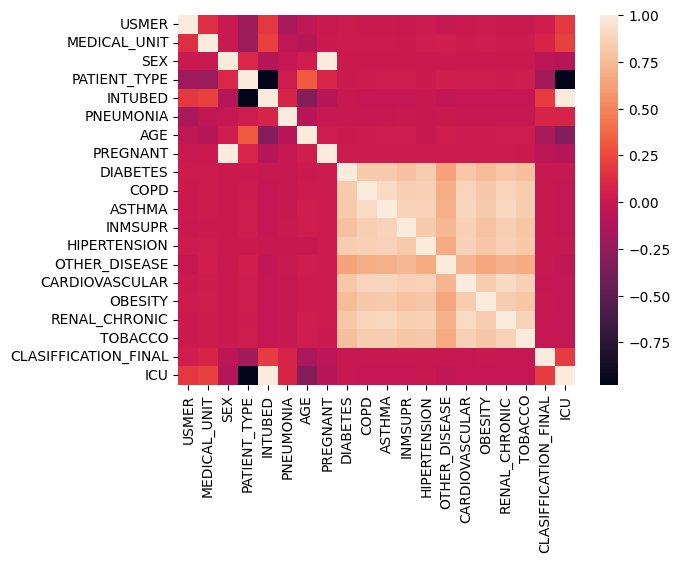

In [53]:
import seaborn as sns
sns.heatmap(data=df.drop(axis=1,columns='DATE_DIED').corr())

## Data Cleaning

We find the total number of missing values in each of the 21 features and corresponding percentage of missing value contributed by each of these features

In [54]:
df_reduced = df.copy()
df_reduced = df_reduced.replace([97, 98, 99], np.nan)
missing_counts = df_reduced.isnull().sum()
invalid_counts = df_reduced.isin([97, 98, 99]).sum()
total_missing_counts = missing_counts + invalid_counts
perc_missing_values = round(total_missing_counts / len(df) * 100, 2)
missing_df = pd.DataFrame({'Feature': df_reduced.columns, 'NaN_count': missing_counts, '97_98_99_count': invalid_counts, 'Total_missing_count': total_missing_counts, 'Percentage_missing': perc_missing_values})
missing_df = missing_df.sort_values(by='Percentage_missing', ascending=False)

print(missing_df)

                                   Feature  NaN_count  97_98_99_count  \
ICU                                    ICU     856032               0   
INTUBED                            INTUBED     855869               0   
PREGNANT                          PREGNANT     527265               0   
PNEUMONIA                        PNEUMONIA      16003               0   
OTHER_DISEASE                OTHER_DISEASE       5045               0   
INMSUPR                            INMSUPR       3404               0   
DIABETES                          DIABETES       3338               0   
TOBACCO                            TOBACCO       3220               0   
HIPERTENSION                  HIPERTENSION       3104               0   
RENAL_CHRONIC                RENAL_CHRONIC       3006               0   
OBESITY                            OBESITY       3032               0   
CARDIOVASCULAR              CARDIOVASCULAR       3076               0   
COPD                                  COPD       30

New copy of the original dataframe is created . We get the count of unique values present in each column 

In [55]:
df_copy = df.copy()
df_copy.shape

for i in df.columns:
 print(df[i].value_counts())
 print('\n')

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


97    523511
2     51317

### PREGNANT column cleaning

As Men cannot be PREGNANT, we convert all the 97(missing values) to 2(No) for all row values with SEX = 2(MALE) 

In [56]:
# replace all the missing values from PREGNANT column if Gender is MALE
print("in original dataset :\n",df_copy[(df_copy.SEX == 2)]['PREGNANT'].value_counts())

df_copy.loc[(df_copy.SEX == 2) & (df_copy.PREGNANT == 97), "PREGNANT"] = df_copy["PREGNANT"].replace(97, 2)

print("\n\nafter above step :\n",df_copy[(df_copy.SEX == 2)]['PREGNANT'].value_counts())

in original dataset :
 97    523511
Name: PREGNANT, dtype: int64


after above step :
 2    523511
Name: PREGNANT, dtype: int64


### CLASIFICATION_FINAL column cleaning

Consider the column CLASIFICATION_FINAL which describes if the patient is tested positive for Covid or was the test inconclusive.

For values >=4 i.e. 4,5,6,7 , the test is either negative or inconclusive, hence, we will replace it with 0("NO") 

For Values 1,2,3 the covid test is Positive, hence, we will replace it with 1("YES")

In [57]:
# Consider CLASSIFICATION column , replace all values >4 with 2("NO") since covid test is inconclusive 
print("\n\nas per original dataset :\n",df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 4), "CLASIFFICATION_FINAL"])

df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 4), "CLASIFFICATION_FINAL"] = df_copy["CLASIFFICATION_FINAL"].replace([4,5,6,7], 0)

print("Repacing 4,5,6,7 with 0 since covid test is inconclusive\n",df_copy['CLASIFFICATION_FINAL'].value_counts())

# Consider all values in [1,2,3] as tested positive for Covid-19 Virus
df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 1), "CLASIFFICATION_FINAL"] = df_copy["CLASIFFICATION_FINAL"].replace([1,2,3], 1)

print("Repacing 1,2,3 with 1 since covid test is Positive\n",df_copy['CLASIFFICATION_FINAL'].value_counts())



as per original dataset :
 1          5
3          7
42         5
43         5
44         5
          ..
1048570    7
1048571    7
1048572    7
1048573    7
1048574    7
Name: CLASIFFICATION_FINAL, Length: 656596, dtype: int64
Repacing 4,5,6,7 with 0 since covid test is inconclusive
 0    656596
3    381527
1      8601
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64
Repacing 1,2,3 with 1 since covid test is Positive
 0    656596
1    391979
Name: CLASIFFICATION_FINAL, dtype: int64


### Basic Feature Selection

We filter out the columns which do not give us useful information 

MEDICAL_UNIT - no useful info can be got since it is not known what the enumerations {1, 2, ... 12, 13} mean.

ICU  and INTUBATED - Too many missing values.

In [58]:
Filtered_Cols=['USMER', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL','PREGNANT']

df_reduced=df_copy[Filtered_Cols].copy()

In [59]:
# The shape of data frame after considering the filled values from different columns
original_number_of_datapoints = df.shape
df_reduced = df_reduced.replace([97, 98, 99], np.nan)
df_reduced=df_reduced.dropna(axis=0)
print(df_reduced.head(),"\nreduced size after data cleaning: ",df_reduced.shape,
      "\noriginal size : ",original_number_of_datapoints)

   USMER  SEX  PATIENT_TYPE   DATE_DIED  PNEUMONIA   AGE  DIABETES  COPD  \
0      2    1             1  03/05/2020        1.0  65.0       2.0   2.0   
1      2    2             1  03/06/2020        1.0  72.0       2.0   2.0   
2      2    2             2  09/06/2020        2.0  55.0       1.0   2.0   
3      2    1             1  12/06/2020        2.0  53.0       2.0   2.0   
4      2    2             1  21/06/2020        2.0  68.0       1.0   2.0   

   ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
0     2.0      2.0           1.0            2.0             2.0      2.0   
1     2.0      2.0           1.0            2.0             2.0      1.0   
2     2.0      2.0           2.0            2.0             2.0      2.0   
3     2.0      2.0           2.0            2.0             2.0      2.0   
4     2.0      2.0           1.0            2.0             2.0      2.0   

   RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  PREGNANT  
0            2.0      2.0 

### Target Cleaning

In [60]:
# "In data set 9999-99-99 indicates person is not died, so replacing these values with 0. Persons who really died has values 03-03-2020 format. So replacing data format values with 1. So 0 means died, 1 means not died in DATE_DIED column

df_reduced["DATE_DIED"] = [0 if each=="9999-99-99" else 1 for each in df_reduced.DATE_DIED]

In [61]:
for i in df_reduced.columns:
 print(df_reduced[i].value_counts())
 print('\n')

2    655933
1    365722
Name: USMER, dtype: int64


2    511795
1    509860
Name: SEX, dtype: int64


1    830233
2    191422
Name: PATIENT_TYPE, dtype: int64


0    947100
1     74555
Name: DATE_DIED, dtype: int64


2.0    884402
1.0    137253
Name: PNEUMONIA, dtype: int64


30.0     26456
31.0     25419
28.0     24735
29.0     24595
34.0     24406
         ...  
115.0        2
119.0        2
111.0        1
121.0        1
113.0        1
Name: AGE, Length: 118, dtype: int64


2.0    899531
1.0    122124
Name: DIABETES, dtype: int64


2.0    1007356
1.0      14299
Name: COPD, dtype: int64


2.0    991243
1.0     30412
Name: ASTHMA, dtype: int64


2.0    1008105
1.0      13550
Name: INMSUPR, dtype: int64


2.0    862521
1.0    159134
Name: HIPERTENSION, dtype: int64


2.0    994597
1.0     27058
Name: OTHER_DISEASE, dtype: int64


2.0    1001613
1.0      20042
Name: CARDIOVASCULAR, dtype: int64


2.0    865081
1.0    156574
Name: OBESITY, dtype: int64


2.0    1003350
1.0      18305
Name

In [62]:
num_died = (df_reduced['DATE_DIED'] == 1).sum()
num_not_died = (df_reduced['DATE_DIED'] == 0).sum()
perc_died = num_died / len(df_reduced) * 100
perc_not_died = num_not_died / len(df_reduced) * 100

# Print the results
print("Number of people who died:", num_died)
print("Number of people who did not die:", num_not_died)
print("Percentage of people who died:", perc_died, "%")
print("Percentage of people who did not die:", perc_not_died, "%")

Number of people who died: 74555
Number of people who did not die: 947100
Percentage of people who died: 7.2974732174755665 %
Percentage of people who did not die: 92.70252678252443 %


### PATIENT_TYPE Column cleaning

Consider the column 'PATIENT_TYPE' . 

It describes whether the patient returned home (1) or hosptialized (2) 
we will change the feature name to Hospitalized and have Yes as 1 No as 0

In [63]:
print("\n\nas per reduced dataset number of samples with patient type 1 and 2 :" , df_reduced["PATIENT_TYPE"].value_counts())

df_reduced.loc[(df_reduced.PATIENT_TYPE == 1), "PATIENT_TYPE"] = df_reduced["PATIENT_TYPE"].replace(1, 0)
df_reduced.loc[(df_reduced.PATIENT_TYPE == 2), "PATIENT_TYPE"] = df_reduced["PATIENT_TYPE"].replace(2, 1)

print("\n\nafter above steps, number of samples with patient type 1 and 2 :" , df_reduced["PATIENT_TYPE"].value_counts())



as per reduced dataset number of samples with patient type 1 and 2 : 1    830233
2    191422
Name: PATIENT_TYPE, dtype: int64


after above steps, number of samples with patient type 1 and 2 : 0    830233
1    191422
Name: PATIENT_TYPE, dtype: int64


### Convert to Binary Feature Vectors

Convert all 2(No) and 1(Yes) Values to binary  0(No) and 1(Yes)

In [64]:
df_final = df_reduced.copy()
for col in df_final.columns:
  df_final = df_final.replace(2,0)

df_final = df_final.astype(int)
df_final

,USMER,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,PREGNANT
0,0,1,0,1,1,65,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,1,72,0,0,0,0,1,0,0,1,1,0,0,0
2,0,0,1,1,0,55,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,53,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,68,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0
1048571,1,0,1,0,0,51,0,0,0,0,1,0,0,0,0,0,0,0
1048572,0,0,0,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0
1048573,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
for i in df_final.columns:
 print(df_final[i].value_counts())
 print('\n')

0    655933
1    365722
Name: USMER, dtype: int64


0    511795
1    509860
Name: SEX, dtype: int64


0    830233
1    191422
Name: PATIENT_TYPE, dtype: int64


0    947100
1     74555
Name: DATE_DIED, dtype: int64


0    884402
1    137253
Name: PNEUMONIA, dtype: int64


30     26456
31     25419
28     24735
29     24595
34     24406
       ...  
115        2
119        2
111        1
121        1
113        1
Name: AGE, Length: 117, dtype: int64


0    899531
1    122124
Name: DIABETES, dtype: int64


0    1007356
1      14299
Name: COPD, dtype: int64


0    991243
1     30412
Name: ASTHMA, dtype: int64


0    1008105
1      13550
Name: INMSUPR, dtype: int64


0    862521
1    159134
Name: HIPERTENSION, dtype: int64


0    994597
1     27058
Name: OTHER_DISEASE, dtype: int64


0    1001613
1      20042
Name: CARDIOVASCULAR, dtype: int64


0    865081
1    156574
Name: OBESITY, dtype: int64


0    1003350
1      18305
Name: RENAL_CHRONIC, dtype: int64


0    939141
1     82514
Name: 

### Applying one hot encoding to AGE and SEX Columns



In [66]:
age_bins = [0, 20, 40, 60, 80, 100, 120]
age_labels = ['0-20', '20-40', '40-60', '60-80','80-100','100-120']
df_final['AGE_GROUP'] = pd.cut(df_final['AGE'], bins=age_bins, labels=age_labels)

# Apply one hot encoding using pd.get_dummies()
one_hot_encoded = pd.get_dummies(df_final['AGE_GROUP'], prefix='AGE')

# Concatenate the original dataframe with the one hot encoded dataframe
df_final = pd.concat([df_final, one_hot_encoded], axis=1)

# Drop the original "AGE" and "AGE_GROUP" columns
df_final.drop(['AGE', 'AGE_GROUP'], axis=1, inplace=True)

gender_one_hot = pd.get_dummies(df_final['SEX'], prefix='GENDER', prefix_sep='')
df_final = pd.concat([df_final, gender_one_hot], axis=1)
df_final.drop(['SEX'], axis=1, inplace=True)

df_final = df_final.rename(columns={'PATIENT_TYPE':'HOSPITALIZED', 'DATE_DIED':'DEATH','CLASIFFICATION_FINAL':'COVID-TEST','GENDER0':'MALE','GENDER1':'FEMALE'})


In [67]:
df_final.head()

,USMER,HOSPITALIZED,DEATH,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,...,COVID-TEST,PREGNANT,AGE_0-20,AGE_20-40,AGE_40-60,AGE_60-80,AGE_80-100,AGE_100-120,MALE,FEMALE
0,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [68]:
for i in df_final.columns:
 print(df_final[i].value_counts())
 print('\n')

0    655933
1    365722
Name: USMER, dtype: int64


0    830233
1    191422
Name: HOSPITALIZED, dtype: int64


0    947100
1     74555
Name: DEATH, dtype: int64


0    884402
1    137253
Name: PNEUMONIA, dtype: int64


0    899531
1    122124
Name: DIABETES, dtype: int64


0    1007356
1      14299
Name: COPD, dtype: int64


0    991243
1     30412
Name: ASTHMA, dtype: int64


0    1008105
1      13550
Name: INMSUPR, dtype: int64


0    862521
1    159134
Name: HIPERTENSION, dtype: int64


0    994597
1     27058
Name: OTHER_DISEASE, dtype: int64


0    1001613
1      20042
Name: CARDIOVASCULAR, dtype: int64


0    865081
1    156574
Name: OBESITY, dtype: int64


0    1003350
1      18305
Name: RENAL_CHRONIC, dtype: int64


0    939141
1     82514
Name: TOBACCO, dtype: int64


0    634185
1    387470
Name: COVID-TEST, dtype: int64


0    1013814
1       7841
Name: PREGNANT, dtype: int64


0    956305
1     65350
Name: AGE_0-20, dtype: int64


0    580748
1    440907
Name: AGE_20-40, dt

<Axes: >

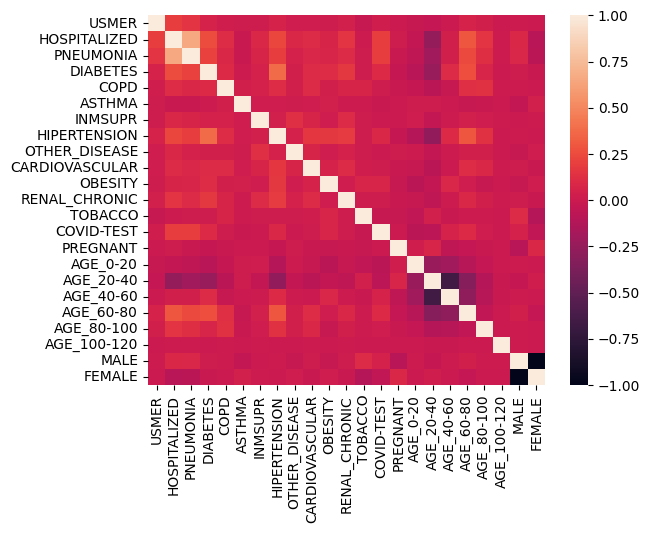

In [69]:
sns.heatmap(data=df_final.drop(axis=1,columns='DEATH').corr())

<Axes: >

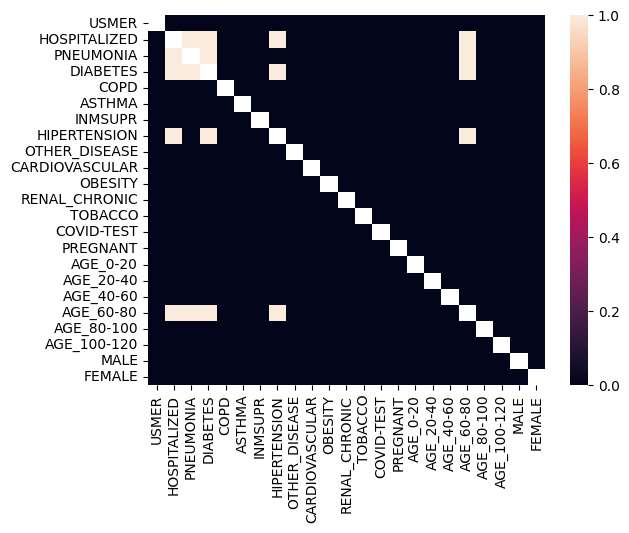

In [70]:
corr_matrix = df_final.drop(axis=1,columns='DEATH').corr() > 0.2
mask = np.eye(len(corr_matrix))
sns.heatmap(data=corr_matrix, mask= mask)

# Data Preparation for Model training

In [71]:
# get 3 sets of data - train , val , test

X = df_final.drop("DEATH", axis=1)
y = df_final["DEATH"]

# this split gives 2 sets for training and final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape, X_test.shape)

(766241, 23) (255414, 23)


In [72]:
y_train.value_counts(), y_test.value_counts()

(0    710383
 1     55858
 Name: DEATH, dtype: int64,
 0    236717
 1     18697
 Name: DEATH, dtype: int64)

Henceforth , we will only use X_train for hyperparameter tuning.
X_test will be reserved only for validating the performance metrics on the final models.

## Feature Extraction 

### Using Random Forest to get the best Features

In [73]:
from sklearn.ensemble import RandomForestClassifier

# X is the binary feature matrix, y is the target variable
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
importances = clf.feature_importances_


In [74]:
important_features = dict(zip(X_train.columns,importances))
important_features = dict(sorted(important_features.items(), key=lambda x: x[1], reverse=True))
print(important_features)

{'HOSPITALIZED': 0.3564379400930583, 'PNEUMONIA': 0.23208733349071703, 'AGE_60-80': 0.07074435875374506, 'COVID-TEST': 0.0668134315721516, 'HIPERTENSION': 0.033996756573546505, 'AGE_20-40': 0.033721066558021144, 'DIABETES': 0.03047677013516047, 'AGE_80-100': 0.023046988510962412, 'USMER': 0.01947306081722737, 'AGE_40-60': 0.017974921527038237, 'OBESITY': 0.015249913146082, 'RENAL_CHRONIC': 0.014163720169891031, 'OTHER_DISEASE': 0.01249441918489071, 'TOBACCO': 0.012118313408902792, 'CARDIOVASCULAR': 0.011806440248389158, 'COPD': 0.010759429609901273, 'INMSUPR': 0.010363729543954463, 'AGE_0-20': 0.007835502049403316, 'ASTHMA': 0.007170259617281672, 'MALE': 0.006231829955954607, 'FEMALE': 0.0060612319495467505, 'PREGNANT': 0.0008261794938423241, 'AGE_100-120': 0.00014640359033181902}


In [75]:
np.cumsum(list(important_features.values()))

array([0.35643794, 0.58852527, 0.65926963, 0.72608306, 0.76007982,
       0.79380089, 0.82427766, 0.84732465, 0.86679771, 0.88477263,
       0.90002254, 0.91418626, 0.92668068, 0.93879899, 0.95060543,
       0.96136486, 0.97172859, 0.9795641 , 0.98673436, 0.99296618,
       0.99902742, 0.9998536 , 1.        ])

Text(0, 0.5, 'Importance of cumulative features')

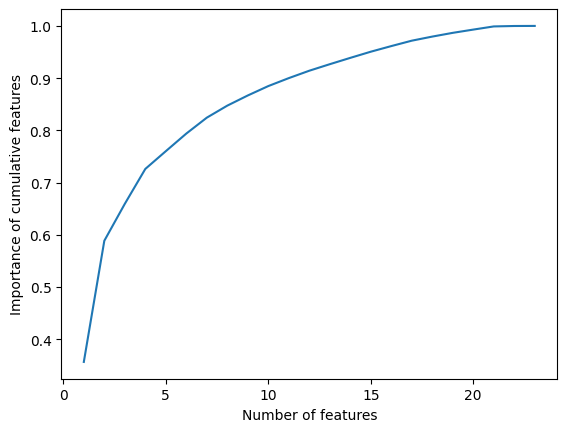

In [76]:
plt.plot(range(1, len(X_train.columns)+1), np.cumsum(list(important_features.values())))
plt.xlabel("Number of features")
plt.ylabel("Importance of cumulative features")

Choose best k features such that importance adds up to 0.9

In [77]:
best_features = list(important_features.keys())[:np.argmax(np.cumsum(list(important_features.values())) >= 0.9)+1]
best_features

['HOSPITALIZED',
 'PNEUMONIA',
 'AGE_60-80',
 'COVID-TEST',
 'HIPERTENSION',
 'AGE_20-40',
 'DIABETES',
 'AGE_80-100',
 'USMER',
 'AGE_40-60',
 'OBESITY']

In [78]:
X_train_feature_reduced = X_train[best_features].copy()
y_train_feature_reduced = y_train.copy()
X_test_feature_reduced = X_test[best_features].copy()
y_test_feature_reduced = y_test.copy()

## Resolving Data Imbalance

### SMOTE Method from imblearn

In [79]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from imblearn.pipeline import Pipeline as imbPipeline

In [80]:
def data_sampling_smote(X,y, undersample_ratio = 0.2, oversample_ratio = 0.5, random_seed = 2023):
  # Define the undersampler and oversampler as part of a pipeline
  undersampler = RandomUnderSampler(sampling_strategy=undersample_ratio, random_state=random_seed)
  oversampler = SMOTE(sampling_strategy=oversample_ratio, random_state=random_seed)
  pipeline = imbPipeline(steps=[('u', undersampler), ('o', oversampler)])

  # Apply the pipeline to the imbalanced dataset
  X_SMOTE, y_SMOTE = pipeline.fit_resample(X, y)
  return X_SMOTE, y_SMOTE

X_train_SMOTE, y_train_SMOTE = data_sampling_smote(X_train, y_train)
# Print the class distribution after balancing
print("Class distribution after balancing:", np.bincount(y_train_SMOTE))

print(X_train_SMOTE.shape)

Class distribution after balancing: [279290 139645]
(418935, 23)


In [81]:
print(y_train_SMOTE.value_counts())

0    279290
1    139645
Name: DEATH, dtype: int64


In [82]:
X_train_SMOTE, y_train_SMOTE = shuffle(X_train_SMOTE, y_train_SMOTE, random_state=2023)

In [83]:
X_train_feature_reduced_SMOTE, y_train_feature_reduced_SMOTE = data_sampling_smote(X_train_feature_reduced, y_train)

In [84]:
print(y_train_feature_reduced_SMOTE.value_counts())

0    279290
1    139645
Name: DEATH, dtype: int64


## Modeling

### Standard Models

#### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
logreg = LogisticRegression(penalty='l2', solver='liblinear')

# Set the hyperparameter search space
param_grid = {'C': [0.1, 1, 10]}

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(logreg, param_grid, cv=5 , scoring=['f1','accuracy', 'precision','recall'], refit = 'f1')

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
pd.DataFrame(grid.cv_results_)


Best hyperparameters:  {'C': 10}
Best score:  0.4852725214617246


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,3.513801,0.259980,0.226910,0.005276,0.1,{'C': 0.1},0.483295,0.485482,0.482715,0.481760,...,0.004703,1,0.408521,0.407126,0.408737,0.406642,0.417293,0.409664,0.003897,3
1,4.092139,0.523542,0.236997,0.026521,1,{'C': 1},0.483704,0.485702,0.483024,0.482412,...,0.004941,2,0.409148,0.407484,0.409453,0.407537,0.420784,0.410881,0.005017,2
2,4.308717,0.257267,0.225490,0.005295,10,{'C': 10},0.483704,0.487125,0.482999,0.482386,...,0.004684,3,0.409148,0.409811,0.409453,0.407537,0.420874,0.411364,0.004818,1


In [86]:
# Fit the GridSearchCV object to the data
grid.fit(X_train_feature_reduced, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
pd.DataFrame(grid.cv_results_)

Best hyperparameters:  {'C': 10}
Best score:  0.47601220795293264


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,2.192197,0.123223,0.237070,0.037959,0.1,{'C': 0.1},0.475459,0.477207,0.472566,0.471115,...,0.005544,1,0.398854,0.398263,0.396294,0.395274,0.408432,0.399423,0.004687,3
1,2.200365,0.160839,0.236907,0.049647,1,{'C': 1},0.476703,0.477207,0.474619,0.471115,...,0.005737,2,0.400644,0.398263,0.400501,0.395274,0.408432,0.400623,0.004363,2
2,2.182133,0.236756,0.232642,0.022816,10,{'C': 10},0.478240,0.477207,0.474619,0.471115,...,0.005557,3,0.404762,0.398263,0.400501,0.395274,0.408432,0.401446,0.004667,1


In [87]:
# Fit the GridSearchCV object to the data
grid.fit(X_train_SMOTE, y_train_SMOTE)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
pd.DataFrame(grid.cv_results_)

Best hyperparameters:  {'C': 1}
Best score:  0.8427538508803153


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,1.940718,0.189371,0.177547,0.032354,0.1,{'C': 0.1},0.842794,0.843900,0.842135,0.842927,...,0.001647,1,0.862258,0.861184,0.860754,0.858033,0.857532,0.859952,0.001845,3
1,1.900243,0.117242,0.175157,0.033312,1,{'C': 1},0.843331,0.843899,0.842527,0.842959,...,0.002018,3,0.864514,0.861076,0.861864,0.857854,0.857209,0.860503,0.002688,1
2,1.995233,0.126327,0.159827,0.002728,10,{'C': 10},0.843317,0.843899,0.842518,0.842937,...,0.002016,2,0.864514,0.861076,0.861613,0.857711,0.857281,0.860439,0.002676,2


In [88]:
# Fit the GridSearchCV object to the data
grid.fit(X_train_feature_reduced_SMOTE, y_train_feature_reduced_SMOTE)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
pd.DataFrame(grid.cv_results_)

Best hyperparameters:  {'C': 0.1}
Best score:  0.8396802462082704


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.821552,0.122652,0.152930,0.029524,0.1,{'C': 0.1},0.838290,0.841719,0.839215,0.839819,...,0.002057,3,0.851302,0.854739,0.855276,0.851516,0.854309,0.853428,0.001678,1
1,0.744029,0.012468,0.141730,0.007601,1,{'C': 1},0.838279,0.841673,0.839189,0.839849,...,0.002054,1,0.851230,0.854631,0.855204,0.851516,0.854238,0.853364,0.001657,2
2,0.851101,0.116436,0.169855,0.029220,10,{'C': 10},0.838279,0.841673,0.839189,0.839849,...,0.002054,1,0.851230,0.854631,0.855204,0.851516,0.854238,0.853364,0.001657,2


Best Results are obtained for the model trained on Resampled training data and hence we will get the performance metrics for the same 

In [89]:
best_lr = LogisticRegression(penalty='l2', solver='liblinear', C=1)

best_lr.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = best_lr.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    236717
           1       0.42      0.86      0.57     18697

    accuracy                           0.90    255414
   macro avg       0.71      0.88      0.76    255414
weighted avg       0.95      0.90      0.92    255414

[[214883  21834]
 [  2628  16069]]


In [90]:
best_lr2 = LogisticRegression(penalty='l1', solver='liblinear', C=1)

best_lr2.fit(X_train, y_train)

y_pred = best_lr2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236717
           1       0.60      0.41      0.49     18697

    accuracy                           0.94    255414
   macro avg       0.78      0.69      0.73    255414
weighted avg       0.93      0.94      0.93    255414

[[231535   5182]
 [ 11011   7686]]


In [91]:
best_lr2 = LogisticRegression(penalty='l1', solver='liblinear', C=1)

best_lr2.fit(X_train_feature_reduced , y_train_feature_reduced)

y_pred = best_lr2.predict(X_test_feature_reduced)

print(classification_report(y_test_feature_reduced, y_pred))
print(confusion_matrix(y_test_feature_reduced, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236717
           1       0.59      0.40      0.48     18697

    accuracy                           0.94    255414
   macro avg       0.77      0.69      0.72    255414
weighted avg       0.93      0.94      0.93    255414

[[231488   5229]
 [ 11144   7553]]


In [92]:
best_lr2 = LogisticRegression(penalty='l1', solver='liblinear', C=1)

best_lr2.fit(X_train_SMOTE , y_train_SMOTE)

y_pred = best_lr2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    236717
           1       0.42      0.86      0.57     18697

    accuracy                           0.90    255414
   macro avg       0.71      0.88      0.76    255414
weighted avg       0.95      0.90      0.92    255414

[[214883  21834]
 [  2628  16069]]


In [93]:
best_lr2 = LogisticRegression(penalty='l1', solver='liblinear', C=1)

best_lr2.fit(X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE)

y_pred = best_lr2.predict(X_test_feature_reduced)

print(classification_report(y_test_feature_reduced, y_pred))
print(confusion_matrix(y_test_feature_reduced, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    236717
           1       0.42      0.85      0.57     18697

    accuracy                           0.90    255414
   macro avg       0.71      0.88      0.76    255414
weighted avg       0.95      0.90      0.92    255414

[[215102  21615]
 [  2761  15936]]


##### Observations


We see that even though the scores for the best models are high , on the Test set, the precision is quite low and recall is high for the positive samples (Samples where patients have died due to covid).

Number of flase positives is greater than the number of true positives which is not a sign of a good model

We would want to have a better precision compared to the best Logistsic regression model

####XGBoost

In [94]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3,20],
    'min_samples_leaf': [2,11]
}
# Create XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=20, min_samples_split=11)

# Create GridSearchCV object
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring=['f1','accuracy','precision', 'recall'], refit='f1', cv=5)


In [95]:
# Fit the model
grid.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)
pd.DataFrame(grid.cv_results_)

[13:15:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:15:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:15:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:16:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:16:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:16:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:16:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:16:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:17:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_f1,split1_test_f1,split2_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,10.990463,0.052726,0.239526,0.007782,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.442115,0.431595,0.442965,...,0.006214,1,0.336019,0.324053,0.339450,0.336914,0.352399,0.337767,0.009042,3
1,10.694700,0.551380,0.276832,0.069744,3,11,"{'max_depth': 3, 'min_samples_leaf': 11}",0.442115,0.431595,0.442965,...,0.006214,1,0.336019,0.324053,0.339450,0.336914,0.352399,0.337767,0.009042,3
2,71.655374,1.206310,0.433345,0.016875,20,2,"{'max_depth': 20, 'min_samples_leaf': 2}",0.464725,0.459534,0.462356,...,0.005624,3,0.378536,0.371050,0.377674,0.383727,0.390798,0.380357,0.006596,1
3,70.856044,0.483291,0.517055,0.155141,20,11,"{'max_depth': 20, 'min_samples_leaf': 11}",0.464725,0.459534,0.462356,...,0.005624,3,0.378536,0.371050,0.377674,0.383727,0.390798,0.380357,0.006596,1


Best model is got with hyperparameters {'max_depth': 20, 'min_samples_leaf': 2 or 11}
we wil fit the training set with this model and observe the classification report 

In [96]:
xgb_best_model = xgb.XGBClassifier(n_estimators=20, min_samples_split=11, max_depth= 20, min_samples_leaf= 2)

X_train, y_train = shuffle(X_train, y_train, random_state=2023)
xgb_best_model.fit(X_train, y_train)

y_pred = xgb_best_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[13:30:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236717
           1       0.60      0.38      0.46     18697

    accuracy                           0.94    255414
   macro avg       0.77      0.68      0.71    255414
weighted avg       0.93      0.94      0.93    255414

[[231947   4770]
 [ 11611   7086]]


In [97]:
X_train_feature_reduced , y_train_feature_reduced = shuffle(X_train_feature_reduced , y_train_feature_reduced, random_state=2023)
xgb_best_model.fit(X_train_feature_reduced , y_train_feature_reduced)

y_pred = xgb_best_model.predict(X_test_feature_reduced)

print(classification_report(y_test_feature_reduced, y_pred))
print(confusion_matrix(y_test_feature_reduced, y_pred))

[13:32:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236717
           1       0.62      0.36      0.46     18697

    accuracy                           0.94    255414
   macro avg       0.79      0.67      0.71    255414
weighted avg       0.93      0.94      0.93    255414

[[232591   4126]
 [ 11924   6773]]


In [98]:
X_train_SMOTE , y_train_SMOTE = shuffle(X_train_SMOTE , y_train_SMOTE, random_state=2023)
xgb_best_model.fit(X_train_SMOTE , y_train_SMOTE)

y_pred = xgb_best_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[13:32:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    236717
           1       0.41      0.89      0.56     18697

    accuracy                           0.90    255414
   macro avg       0.70      0.89      0.75    255414
weighted avg       0.95      0.90      0.91    255414

[[212303  24414]
 [  2012  16685]]


In [99]:
X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE = shuffle(
    X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, random_state=2023)

xgb_best_model.fit(X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE)

y_pred = xgb_best_model.predict(X_test_feature_reduced)

print(classification_report(y_test_feature_reduced, y_pred))
print(confusion_matrix(y_test_feature_reduced, y_pred))

[13:33:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    236717
           1       0.40      0.92      0.55     18697

    accuracy                           0.89    255414
   macro avg       0.69      0.90      0.75    255414
weighted avg       0.95      0.89      0.91    255414

[[210469  26248]
 [  1519  17178]]


##### Observations

As we use the originl preprocessed dataset without feature reduction or oversampling we see that the precision values are high which is needed but the recall is pretty and this is also similar in case of feature reduced dataset 

However when we resample and train the model , it suddenly has very high recall and low precision value . Indicating it maybe overfitting due to increased positive samples 

Even though the XGBoost gives us better results compared to logisitic regression , the time to train is more compared to logistic regression and as mentioned above , it is sensitive to data resampling

####Decision Trees

In [100]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
 
def fitting(X_in, y, X_test, y_test, criterion, splitter, mdepth, clweight, minleaf):
 
 # Fit the model
 model = DecisionTreeClassifier(criterion=criterion, 
 splitter=splitter, 
 max_depth=mdepth,
 class_weight=clweight,
 min_samples_leaf=minleaf, 
 random_state=0, 
 )
 clf = model.fit(X_in, y)
 
 # Predict class labels on training data
 pred_labels_tr = model.predict(X_test)
 
 # Use score method to get accuracy of the model
 print('*************** Tree Summary ***************')
 print('Classes: ', clf.classes_)
 print('Tree Depth: ', clf.tree_.max_depth)
 print('No. of leaves: ', clf.tree_.n_leaves)
 print('No. of features: ', X_in.shape[1])
 print('--------------------------------------------------------')
 print("")
 
 print('*************** Evaluation on Training Data ***************')
 score_tr = model.score(X_test, y_test)
 print('Accuracy Score: ', score_tr)
 # Look at classification report to evaluate the model
 print(classification_report(y_test, pred_labels_tr))
 print('--------------------------------------------------------')
 
 # Return relevant data for chart plotting
 return clf
 


In [101]:
X_train, y_train = shuffle(X_train, y_train, random_state=2023)
clf = fitting(X_train, y_train, X_test, y_test,'entropy', 'best', mdepth=5, clweight=None, minleaf=10)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  5
No. of leaves:  32
No. of features:  23
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9362329394629895
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    236717
           1       0.65      0.28      0.39     18697

    accuracy                           0.94    255414
   macro avg       0.80      0.63      0.68    255414
weighted avg       0.92      0.94      0.92    255414

--------------------------------------------------------


In [102]:
X_train_feature_reduced, y_train_feature_reduced = shuffle(
    X_train_feature_reduced, y_train_feature_reduced, random_state=2023)

clf = fitting(X_train_feature_reduced, y_train_feature_reduced, 
              X_test_feature_reduced, y_test_feature_reduced ,'entropy', 'best', mdepth=10, clweight=None, minleaf=15)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  10
No. of leaves:  459
No. of features:  11
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9371804208070035
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236717
           1       0.62      0.36      0.46     18697

    accuracy                           0.94    255414
   macro avg       0.79      0.67      0.71    255414
weighted avg       0.93      0.94      0.93    255414

--------------------------------------------------------


In [103]:
X_train_SMOTE, y_train_SMOTE = shuffle(X_train_SMOTE, y_train_SMOTE, random_state=2023)
clf = fitting(X_train_SMOTE, y_train_SMOTE, X_test, y_test,'entropy', 'best', mdepth=5, clweight=None, minleaf=10)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  5
No. of leaves:  32
No. of features:  23
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8876960542491797
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    236717
           1       0.39      0.92      0.55     18697

    accuracy                           0.89    255414
   macro avg       0.69      0.90      0.74    255414
weighted avg       0.95      0.89      0.91    255414

--------------------------------------------------------


In [104]:
X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE = shuffle(X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, random_state=2023)
clf = fitting(X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, X_test_feature_reduced, y_test,'entropy', 'best', mdepth=5, clweight=None, minleaf=10)

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  5
No. of leaves:  32
No. of features:  11
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8811380738722231
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    236717
           1       0.37      0.93      0.53     18697

    accuracy                           0.88    255414
   macro avg       0.68      0.90      0.73    255414
weighted avg       0.95      0.88      0.90    255414

--------------------------------------------------------


##### Observations

The results of DT are similar to that of Logisitic regression and we see that the timing for computation is significantly less compared to XGBoost 

However, the model is very sensitive towards data resampling as recall is extremely high while precision is very low in case of resampled dataset 

This could still be considered for modelling purpose as it has the added advantage of good accuracy and precision values when data is not resampled along with lesser computation time

Logistic Regression< XGBoost <= Decision Trees

### Custom Models

#### Classifier- Classifier Ensemble 

In [105]:
def print_scoring_reports(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  print(classification_report(y_true, y_pred))
  print("Confusion matrix:\n", cm)

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

def custom_ensemble_1(X, y, gridsearch=True, X_val=None, y_val=None):

  # separate positive and negative samples
  X_train_pos = X[y == 0]
  y_train_pos = y[y == 0]
  X_train_neg = X[y == 1]
  y_train_neg = y[y == 1]

  print(y_train_neg.shape)
  # Define individual classifiers
  clf1 = make_pipeline(DecisionTreeClassifier(random_state=2023, 
                                              splitter='best',
                                              criterion='entropy',
                                              min_samples_leaf=10, 
                                              max_depth=5))
  clf2 = make_pipeline(DecisionTreeClassifier(random_state=2023, 
                                              splitter='best',
                                              criterion='entropy',
                                              min_samples_leaf=10, 
                                              max_depth=5))

  # Fit classifiers on masked data
  clf1.fit(X_train_pos, y_train_pos)
  clf2.fit(X_train_neg, y_train_neg)

  # Define the ensemble model
  ensemble_model = VotingClassifier(estimators=[
      ('clf1', clf1),
      ('clf2', clf2)],
  voting='soft'
  )
  
  if gridsearch == True:
    param_grid = {}
    # Create GridSearchCV object
    grid = GridSearchCV(estimator=ensemble_model,  param_grid = param_grid,
                            scoring=['f1','accuracy','precision', 'recall'], refit='f1', cv=5)
    
    grid.fit(X,y)
    # Print best hyperparameters and corresponding score
    print("Best parameters: ", grid.best_params_)
    print("Best score: ", grid.best_score_)
    return pd.DataFrame(grid.cv_results_)
  else:
    ensemble_model.fit(X, y)
    y_pred_train = ensemble_model.predict(X)
    y_pred_proba = ensemble_model.predict_proba(X_val)
    y_pred = ensemble_model.predict(X_val)
    return y_pred, y_pred_proba, y_pred_train



In [107]:
custom_ensemble_1(X_train, y_train, True)

(55858,)
Best parameters:  {}
Best score:  0.40187623913504644


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,...,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,2.237894,0.158393,0.230567,0.042792,{},0.400649,0.428488,0.385914,0.408493,0.385838,...,0.015449,1,0.287325,0.326649,0.272223,0.296187,0.276047,0.291686,0.019417,1


In [108]:
X_train, y_train = shuffle(X_train, y_train, random_state=2023)
y_pred, y_pred_proba, y_pred_train = custom_ensemble_1(X_train, y_train, False, X_test, y_test)
print_scoring_reports(y_test, y_pred)
print_scoring_reports(y_train, y_pred_train)

(55858,)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    236717
           1       0.65      0.28      0.39     18697

    accuracy                           0.94    255414
   macro avg       0.80      0.63      0.68    255414
weighted avg       0.92      0.94      0.92    255414

Confusion matrix:
 [[233865   2852]
 [ 13435   5262]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    710383
           1       0.65      0.29      0.40     55858

    accuracy                           0.94    766241
   macro avg       0.80      0.64      0.68    766241
weighted avg       0.92      0.94      0.93    766241

Confusion matrix:
 [[701943   8440]
 [ 39880  15978]]


In [109]:
X_train_SMOTE, y_train_SMOTE = shuffle(X_train_SMOTE, y_train_SMOTE, random_state=2023)
y_pred, y_pred_proba, y_pred_train = custom_ensemble_1(X_train_SMOTE, y_train_SMOTE, False, X_test, y_test)
print_scoring_reports(y_test, y_pred)
print_scoring_reports(y_train_SMOTE, y_pred_train)

(139645,)
              precision    recall  f1-score   support

           0       0.99      0.89      0.94    236717
           1       0.39      0.92      0.55     18697

    accuracy                           0.89    255414
   macro avg       0.69      0.90      0.74    255414
weighted avg       0.95      0.89      0.91    255414

Confusion matrix:
 [[209504  27213]
 [  1471  17226]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92    279290
           1       0.80      0.92      0.86    139645

    accuracy                           0.90    418935
   macro avg       0.88      0.90      0.89    418935
weighted avg       0.91      0.90      0.90    418935

Confusion matrix:
 [[247666  31624]
 [ 10839 128806]]


In [110]:
X_train_feature_reduced , y_train_feature_reduced = shuffle(
    X_train_feature_reduced , y_train_feature_reduced, random_state=2023)

y_pred, y_pred_proba, y_pred_train = custom_ensemble_1(
    X_train_feature_reduced , y_train_feature_reduced, False, X_test_feature_reduced, y_test_feature_reduced)

print_scoring_reports(y_test_feature_reduced , y_pred)
print_scoring_reports(y_train_feature_reduced, y_pred_train)

(55858,)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    236717
           1       0.65      0.28      0.39     18697

    accuracy                           0.94    255414
   macro avg       0.80      0.63      0.68    255414
weighted avg       0.92      0.94      0.92    255414

Confusion matrix:
 [[233865   2852]
 [ 13435   5262]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    710383
           1       0.65      0.29      0.40     55858

    accuracy                           0.94    766241
   macro avg       0.80      0.64      0.68    766241
weighted avg       0.92      0.94      0.93    766241

Confusion matrix:
 [[701943   8440]
 [ 39880  15978]]


In [111]:
X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE = shuffle(
    X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, random_state=2023)

y_pred, y_pred_proba, y_pred_train = custom_ensemble_1(
    X_train_feature_reduced_SMOTE , y_train_feature_reduced_SMOTE, False, 
    X_test_feature_reduced, y_test_feature_reduced)

print_scoring_reports(y_test_feature_reduced , y_pred)
print_scoring_reports(y_train_feature_reduced_SMOTE, y_pred_train)

(139645,)
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    236717
           1       0.37      0.93      0.53     18697

    accuracy                           0.88    255414
   macro avg       0.68      0.90      0.73    255414
weighted avg       0.95      0.88      0.90    255414

Confusion matrix:
 [[207701  29016]
 [  1343  17354]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92    279290
           1       0.79      0.93      0.86    139645

    accuracy                           0.90    418935
   macro avg       0.88      0.90      0.89    418935
weighted avg       0.91      0.90      0.90    418935

Confusion matrix:
 [[245459  33831]
 [  9852 129793]]


#### Unsupervised - Supervised Ensemble

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

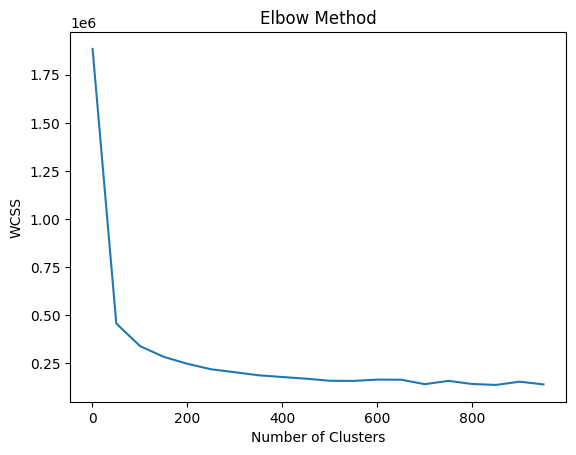

In [113]:
wcss = []
for i in range(1, 1000, 50):
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=1000, random_state=2023, n_init='auto', max_no_improvement=2)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 1000, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

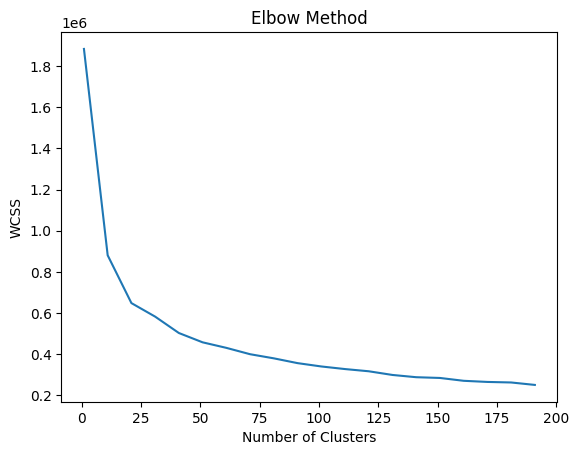

In [114]:
wcss = []
for i in range(1, 200, 10):
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=1000, random_state=2023, n_init='auto', max_no_improvement=2)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 200, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [115]:
dict(zip(range(1,200,10),wcss))

{1: 1883716.1988242234,
 11: 880525.9918506222,
 21: 648274.3465194262,
 31: 582480.425141818,
 41: 502817.3752775856,
 51: 457573.96351999947,
 61: 430658.95893665205,
 71: 399794.73725614644,
 81: 379720.4230010557,
 91: 356449.93787697423,
 101: 340237.9161820125,
 111: 327610.0973677108,
 121: 316882.27105141175,
 131: 298953.15327915456,
 141: 288012.23902782565,
 151: 284369.1818659834,
 161: 270546.1739415006,
 171: 265026.7561735832,
 181: 262414.3335401148,
 191: 250517.7186066224}

Choosing 21 clusters as that is the knee where the slope starts becoming flat significantly

In [116]:
# Create MiniBatchKMeans object
kmeans = MiniBatchKMeans(n_clusters=21, batch_size=2000, random_state=2023, n_init='auto')

# Fit the model to the data
kmeans.fit(X_train)

# Get the cluster labels
labels = kmeans.labels_

# Combine the cluster labels and the target variable into a single DataFrame
results = pd.DataFrame({'Cluster': labels, 'Target': y_train})

# Convert 'Cluster' column into one-hot encoding
cluster_one_hot = pd.get_dummies(results['Cluster'], prefix='Cluster')

y_train_cluster = cluster_one_hot.copy()

y_train_cluster['Target'] = y_train

In [117]:
# predict clusters for X_test
test_cluster_labels = kmeans.predict(X_test)

test_cluster_results = pd.DataFrame({'Cluster': test_cluster_labels, 'Target': y_test})

# Convert 'Cluster' column into one-hot encoding
test_cluster_one_hot = pd.get_dummies(test_cluster_results['Cluster'], prefix='Cluster')

X_test_cluster = pd.concat([X_test, test_cluster_one_hot], axis=1)

In [118]:
clf = DecisionTreeClassifier(max_depth=70, random_state=0)
clf.fit(y_train_cluster.drop('Target', axis=1), y_train_cluster['Target'])
importances_in_clusters = clf.feature_importances_

In [119]:
important_clusters = dict(zip(y_train_cluster.columns,importances_in_clusters))
important_clusters = dict(sorted(important_clusters.items(), key=lambda x: x[1], reverse=True))
print(important_clusters)

{'Cluster_5': 0.36621797217872176, 'Cluster_16': 0.20189177913869022, 'Cluster_9': 0.16680961741180322, 'Cluster_6': 0.1269589590833733, 'Cluster_8': 0.12372475954679595, 'Cluster_14': 0.0061903312408443595, 'Cluster_15': 0.005183063508986751, 'Cluster_1': 0.0012916236179387715, 'Cluster_19': 0.0009395134886904147, 'Cluster_17': 0.00040967411728791767, 'Cluster_3': 0.00017770026075841539, 'Cluster_4': 7.366320767090157e-05, 'Cluster_20': 5.9016050230066145e-05, 'Cluster_11': 3.442971068944148e-05, 'Cluster_18': 1.4958895289986207e-05, 'Cluster_12': 7.833195696389735e-06, 'Cluster_0': 6.004970467138396e-06, 'Cluster_2': 5.855656006465869e-06, 'Cluster_7': 3.2427974630042626e-06, 'Cluster_10': 1.9225957334483226e-09, 'Cluster_13': 0.0}


In [120]:
np.cumsum(list(important_clusters.values()))

array([0.36621797, 0.56810975, 0.73491937, 0.86187833, 0.98560309,
       0.99179342, 0.99697648, 0.99826811, 0.99920762, 0.99961729,
       0.99979499, 0.99986866, 0.99992767, 0.9999621 , 0.99997706,
       0.99998489, 0.9999909 , 0.99999676, 1.        , 1.        ,
       1.        ])

Text(0, 0.5, 'Importance of cumulative features')

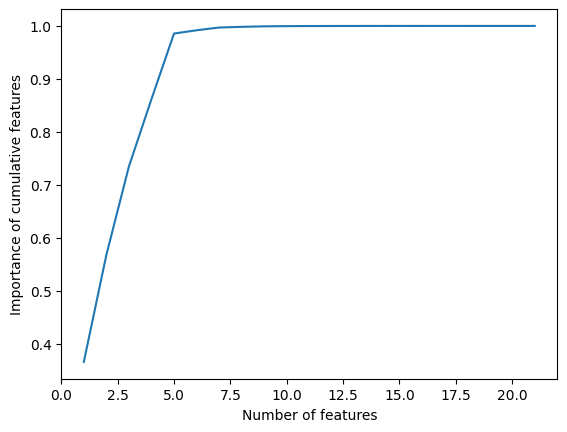

In [121]:
plt.plot(range(1, len(y_train_cluster.columns)), np.cumsum(list(important_clusters.values())))
plt.xlabel("Number of features")
plt.ylabel("Importance of cumulative features")

In [122]:
best_clusters = list(important_clusters.keys())[:np.argmax(np.cumsum(list(important_clusters.values())) >= 0.98)+1]
best_clusters

['Cluster_5', 'Cluster_16', 'Cluster_9', 'Cluster_6', 'Cluster_8']

In [123]:
def custom_ensemble_2(X,y, X_val, y_val):
  
  # Create MiniBatchKMeans object
  kmeans = MiniBatchKMeans(n_clusters=21, batch_size=1000, random_state=2023, n_init='auto')

  # Fit the model to the data
  kmeans.fit(X)

  # Get the cluster labels
  labels = kmeans.labels_

  # Combine the cluster labels and the target variable into a single DataFrame
  results = pd.DataFrame({'Cluster': labels, 'Target': y})

  # Convert 'Cluster' column into one-hot encoding
  cluster_one_hot = pd.get_dummies(results['Cluster'], prefix='Cluster')

  # Concatenate the best one-hot encoded 'Cluster' feature to X
  X_with_cluster = pd.concat([X, cluster_one_hot[best_clusters]], axis=1)
  # X_with_cluster = cluster_one_hot[best_clusters]

  # predict clusters for X_test
  test_cluster_labels = kmeans.predict(X_val)

  val_cluster_results = pd.DataFrame({'Cluster': test_cluster_labels, 'Target': y_val})

  # Convert 'Cluster' column into one-hot encoding
  val_cluster_one_hot = pd.get_dummies(val_cluster_results['Cluster'], prefix='Cluster')

  # Concatenate the best one-hot encoded 'Cluster' feature to X_val
  X_val_cluster = pd.concat([X_val, val_cluster_one_hot[best_clusters]], axis=1)
  # X_val_cluster = val_cluster_one_hot[best_clusters]

  # Compute the mean target value for each cluster
  mean_target = results.groupby('Cluster')['Target'].mean()

  # Numer of people who died vs number of who survived 
  # for label in np.unique(labels):
  #   print(f"\nCluster {label}:\n # dead: ",results[(results.Cluster == label) & (results.Target == 1)].shape[0],
  #         " vs # not dead: ",
  #         results[(results.Cluster == label) & (results.Target == 0)].shape[0])
    
  print("\n",mean_target,"\n")
  
  # Define individual classifiers
  #'entropy', 'best', mdepth=5, clweight=None, minleaf=10
  clf1 = make_pipeline(LogisticRegression(penalty='l1', solver='liblinear'))
  clf2 = make_pipeline(LogisticRegression(penalty='l1', solver='liblinear'))
  clf3 = make_pipeline(DecisionTreeClassifier(random_state=2023, max_depth=5,
                                              criterion='entropy', 
                                              splitter='best',
                                              min_samples_leaf=10,
                                              max_features="log2"))
  clf4 = make_pipeline(DecisionTreeClassifier(random_state=2023, max_depth=5,
                                              criterion='entropy', 
                                              splitter='best',
                                              min_samples_leaf=10,
                                              max_features="log2"))
  # Fit classifiers on masked data
  clf1.fit(X_with_cluster, y)
  clf2.fit(X_with_cluster, y)
  clf3.fit(X_with_cluster, y)
  clf4.fit(X_with_cluster, y)

  # Define the ensemble model
  ensemble_model = VotingClassifier(estimators=[
      ('clf1', clf1),
      ('clf2', clf2),
      ('clf3', clf3), 
      ('clf4', clf4)], 
      weights=[1, 1, 1, 1],
      voting = 'soft'
      )

  ensemble_model.fit(X_with_cluster, y)

  # Get the best model and print its accuracy
  y_pred = ensemble_model.predict(X_val_cluster)
  y_pred_proba = ensemble_model.predict_proba(X_val_cluster)
  return y_pred, y_pred_proba




In [124]:
X_train, y_train = shuffle(X_train, y_train, random_state=2023)

y_pred, y_pred_proba = custom_ensemble_2(X_train, y_train, X_test, y_test)
print_scoring_reports(y_test, y_pred)


 Cluster
0     0.046803
1     0.003634
2     0.007216
3     0.231373
4     0.032108
5     0.004916
6     0.435276
7     0.105231
8     0.316948
9     0.008730
10    0.017014
11    0.053105
12    0.017255
13    0.022235
14    0.049687
15    0.007361
16    0.006428
17    0.355689
18    0.010832
19    0.006526
20    0.019924
Name: Target, dtype: float64 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    236717
           1       0.64      0.29      0.40     18697

    accuracy                           0.94    255414
   macro avg       0.79      0.64      0.68    255414
weighted avg       0.92      0.94      0.92    255414

Confusion matrix:
 [[233673   3044]
 [ 13312   5385]]


In [125]:
X_train_feature_reduced, y_train_feature_reduced = shuffle(
    X_train_feature_reduced, y_train_feature_reduced, random_state=19)

y_pred, y_pred_proba = custom_ensemble_2(
    X_train_feature_reduced, y_train_feature_reduced, X_test_feature_reduced, y_test_feature_reduced)

print_scoring_reports(y_test_feature_reduced, y_pred)


 Cluster
0     0.004188
1     0.006597
2     0.020161
3     0.010188
4     0.024097
5     0.002043
6     0.427002
7     0.004676
8     0.151875
9     0.014504
10    0.426376
11    0.063406
12    0.012488
13    0.291109
14    0.223109
15    0.480041
16    0.016973
17    0.353954
18    0.010250
19    0.144936
20    0.586126
Name: Target, dtype: float64 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    236717
           1       0.62      0.35      0.45     18697

    accuracy                           0.94    255414
   macro avg       0.78      0.67      0.71    255414
weighted avg       0.93      0.94      0.93    255414

Confusion matrix:
 [[232642   4075]
 [ 12075   6622]]


In [126]:
y_pred, y_pred_proba = custom_ensemble_2(X_train_SMOTE, y_train_SMOTE, X_test, y_test)
print_scoring_reports(y_test, y_pred)


 Cluster
0     0.283337
1     0.113558
2     0.008223
3     0.843120
4     0.046907
5     0.815478
6     0.872080
7     0.120121
8     0.739349
9     0.148986
10    0.201242
11    0.048399
12    0.079474
13    0.500347
14    0.754782
15    0.030825
16    0.759601
17    0.669175
18    0.873584
19    0.019780
20    0.066052
Name: Target, dtype: float64 

              precision    recall  f1-score   support

           0       0.99      0.89      0.94    236717
           1       0.39      0.88      0.54     18697

    accuracy                           0.89    255414
   macro avg       0.69      0.89      0.74    255414
weighted avg       0.95      0.89      0.91    255414

Confusion matrix:
 [[211078  25639]
 [  2246  16451]]


In [127]:
y_pred, y_pred_proba = custom_ensemble_2(
    X_train_feature_reduced_SMOTE, y_train_feature_reduced_SMOTE, X_test_feature_reduced, y_test_feature_reduced )
print_scoring_reports(y_test_feature_reduced, y_pred)


 Cluster
0     0.845107
1     0.013389
2     0.907461
3     0.049669
4     0.795569
5     0.517724
6     0.032030
7     0.861510
8     0.146495
9     0.752801
10    0.599236
11    0.023077
12    0.496282
13    0.083103
14    0.178799
15    0.119646
16    0.849709
17    0.862179
18    0.051642
19    0.574589
20    0.644486
Name: Target, dtype: float64 

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    236717
           1       0.41      0.90      0.56     18697

    accuracy                           0.90    255414
   macro avg       0.70      0.90      0.75    255414
weighted avg       0.95      0.90      0.91    255414

Confusion matrix:
 [[212093  24624]
 [  1861  16836]]


New resampling of data to check if resampling helps as it increased the precision values in above model

In [128]:
X_train_SMOTE1, y_train_SMOTE1 = data_sampling_smote(X_train, y_train, 0.49, 0.51)

In [129]:
y_train_SMOTE1.mean()

0.33774661306439246

In [130]:
y_pred, y_pred_proba = custom_ensemble_2(
    X_train_SMOTE1, y_train_SMOTE1, X_test, y_test )

print_scoring_reports(y_test, y_pred)


 Cluster
0     0.109053
1     0.049871
2     0.139507
3     0.019844
4     0.037785
5     0.901325
6     0.721295
7     0.067157
8     0.057296
9     0.146945
10    0.599450
11    0.172457
12    0.762300
13    0.785006
14    0.040319
15    0.858360
16    0.822448
17    0.864071
18    0.036838
19    0.762951
20    0.780296
Name: Target, dtype: float64 

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    236717
           1       0.41      0.88      0.56     18697

    accuracy                           0.90    255414
   macro avg       0.70      0.89      0.75    255414
weighted avg       0.95      0.90      0.92    255414

Confusion matrix:
 [[213270  23447]
 [  2304  16393]]


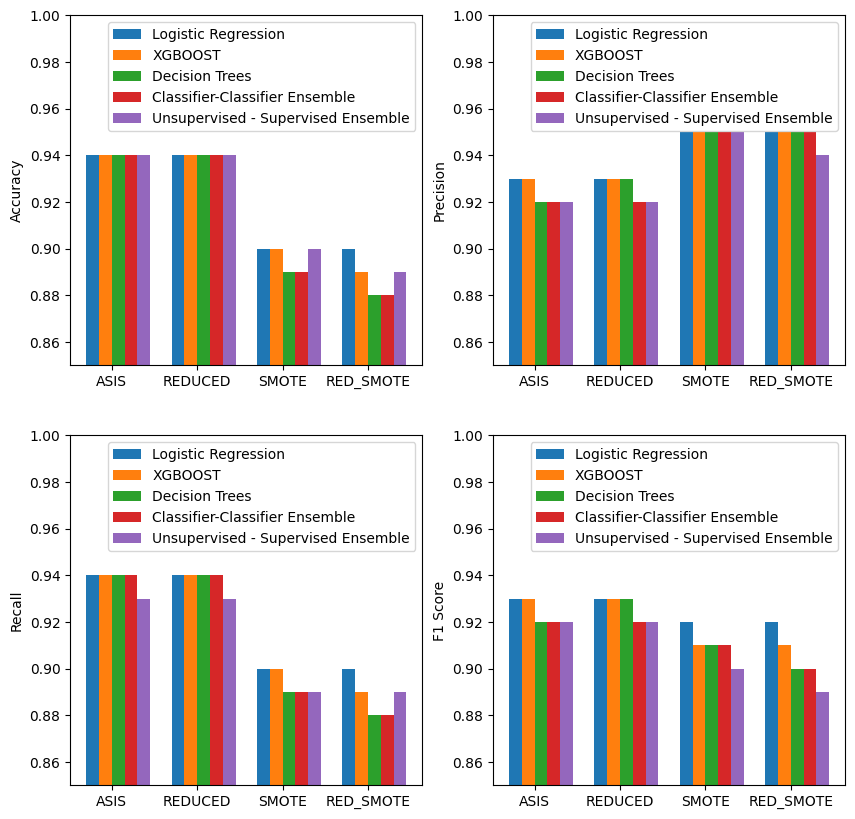

In [146]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
logistic_regression_acc = [0.94, 0.94, 0.90, 0.90]
xgboost_acc = [0.94, 0.94, 0.90, 0.89]
decision_trees_acc = [0.94, 0.94, 0.89, 0.88]
classifier_ensemble_acc = [0.94, 0.94, 0.89, 0.88]
unsupervised_supervised_ensemble_acc = [0.94, 0.94, 0.90, 0.89]

logistic_regression_prec = [0.93, 0.93, 0.95, 0.95]
xgboost_prec = [0.93, 0.93, 0.95, 0.95]
decision_trees_prec = [0.92, 0.93, 0.95, 0.95]
classifier_ensemble_prec = [0.92, 0.92, 0.95, 0.95]
unsupervised_supervised_ensemble_prec = [0.92, 0.92, 0.95, 0.94]

logistic_regression_recall = [0.94, 0.94, 0.90, 0.90]
xgboost_recall = [0.94, 0.94, 0.90, 0.89]
decision_trees_recall = [0.94, 0.94, 0.89, 0.88]
classifier_ensemble_recall = [0.94, 0.94, 0.89, 0.88]
unsupervised_supervised_ensemble_recall = [0.93, 0.93, 0.89, 0.89]

logistic_regression_f1 = [0.93, 0.93, 0.92, 0.92]
xgboost_f1 = [0.93, 0.93, 0.91, 0.91]
decision_trees_f1 = [0.92, 0.93, 0.91, 0.90]
classifier_ensemble_f1 = [0.92, 0.92, 0.91, 0.90]
unsupervised_supervised_ensemble_f1 = [0.92, 0.92, 0.90, 0.89]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Set x-axis ticks
x = np.arange(4)
labels = ['ASIS', 'REDUCED', 'SMOTE', 'RED_SMOTE']

# Set bar width
width = 0.15

# Accuracy plot
axs[0, 0].bar(x - 2 * width, logistic_regression_acc, width, label='Logistic Regression')
axs[0, 0].bar(x - width, xgboost_acc, width, label='XGBOOST')
axs[0, 0].bar(x, decision_trees_acc, width, label='Decision Trees')
axs[0, 0].bar(x + width, classifier_ensemble_acc, width, label='Classifier-Classifier Ensemble')
axs[0, 0].bar(x + 2 * width, unsupervised_supervised_ensemble_acc, width, label='Unsupervised - Supervised Ensemble')
axs[0, 0].set_xticks(x - width / 2)
axs[0, 0].set_xticklabels(labels)
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim(0.85, 1)
axs[0, 0].legend()

# Precision plot
axs[0, 1].bar(x - 2 * width, logistic_regression_prec, width, label='Logistic Regression')
axs[0, 1].bar(x - width, xgboost_prec, width, label='XGBOOST')
axs[0, 1].bar(x, decision_trees_prec, width, label='Decision Trees')
axs[0, 1].bar(x + width, classifier_ensemble_prec, width, label='Classifier-Classifier Ensemble')
axs[0, 1].bar(x + 2 * width, unsupervised_supervised_ensemble_prec, width, label='Unsupervised - Supervised Ensemble')
axs[0, 1].set_xticks(x - width / 2)
axs[0, 1].set_xticklabels(labels)
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_ylim(0.85, 1)
axs[0, 1].legend()

# Recall plot
axs[1, 0].bar(x - 2 * width, logistic_regression_recall, width, label='Logistic Regression')
axs[1, 0].bar(x - width, xgboost_recall, width, label='XGBOOST')
axs[1, 0].bar(x, decision_trees_recall, width, label='Decision Trees')
axs[1, 0].bar(x + width, classifier_ensemble_recall, width, label='Classifier-Classifier Ensemble')
axs[1, 0].bar(x + 2 * width, unsupervised_supervised_ensemble_recall, width, label='Unsupervised - Supervised Ensemble')
axs[1, 0].set_xticks(x - width / 2)
axs[1, 0].set_xticklabels(labels)
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_ylim(0.85, 1)
axs[1, 0].legend()

# F1 score plot
axs[1, 1].bar(x - 2 * width, logistic_regression_f1, width, label='Logistic Regression')
axs[1, 1].bar(x - width, xgboost_f1, width, label='XGBOOST')
axs[1, 1].bar(x, decision_trees_f1, width, label='Decision Trees')
axs[1, 1].bar(x + width, classifier_ensemble_f1, width, label='Classifier-Classifier Ensemble')
axs[1, 1].bar(x + 2 * width, unsupervised_supervised_ensemble_f1, width, label='Unsupervised - Supervised Ensemble')
axs[1, 1].set_xticks(x - width / 2)
axs[1, 1].set_xticklabels(labels)
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].set_ylim(0.85, 1)
axs[1, 1].legend()
